In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

## Data Exploration
****

In [2]:
# Loading the training and testing datasets
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")
data_total = pd.concat([data_train, data_test])

In [3]:
# Extracting the number of rows
data_total.shape[0]

1309

#### Each row in the dataset represents a unique passenger. So there are a total of 1309 passengers whose data is represented here.

In [4]:
# Extracting the number of columns
data_total.shape[1]

12

#### Each cloumn represents a unique feature associated with the passenger like age, gender, ticket class and survival status etc..

In [5]:
# printing the first five rows of the dataset
data_total.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Getting the total number of survivors
total_survivors = data_total['Survived'].sum()
total_survivors

342.0

In [7]:
data_total.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


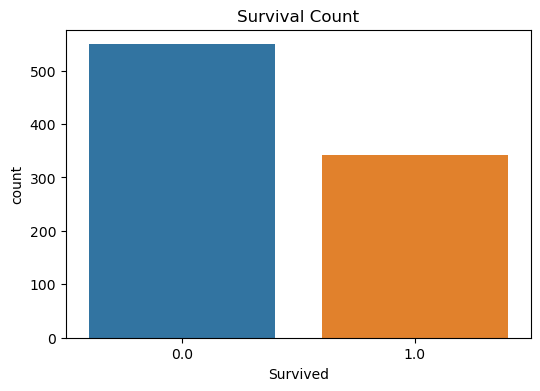

In [8]:
# Bar plot for Survival Counts
plt.figure(figsize=(6, 4))
sb.countplot(data=data_total, x='Survived')
plt.title('Survival Count')
plt.show()

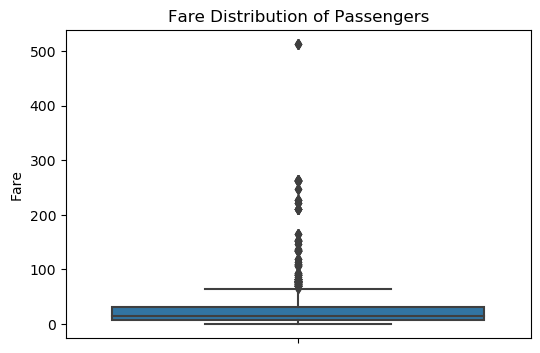

In [9]:
# Boxplot for Fare Distribution
plt.figure(figsize=(6, 4))
sb.boxplot(data=data_total, y='Fare')
plt.title('Fare Distribution of Passengers')
plt.show()

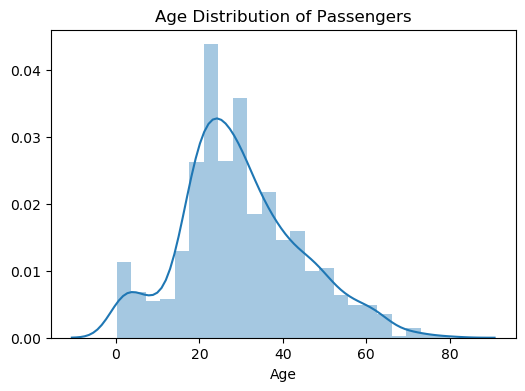

In [10]:
# Histogram for Age Distribution
plt.figure(figsize=(6, 4))
sb.distplot(data_total['Age'])
plt.title('Age Distribution of Passengers')
plt.show()

## Data Transformation
*****

In [11]:
# displaying the features available in the dataset
print("Variables included:\n" , data_total.columns.tolist())

Variables included:
 ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']




| Variable      | Description                        | Usefulness                                                     |
|---------------|------------------------------------|----------------------------------------------------------------|
| PassengerId   | Unique ID for each passenger       | Not useful for prediction, acts as an identifier               |
| Survived      | Survival status (0 = No, 1 = Yes)  | **_Target variable_** we want to predict                             |
| Pclass        | Passenger class (1, 2, or 3)       | Useful for predicting survival, as higher classes had better survival rates |
| Name          | Passenger name                     | Not directly useful; could extract titles like "Mr.", "Miss", etc. |
| Sex           | Gender of the passenger            | Useful, as gender impacted survival                            |
| Age           | Age of the passenger               | Useful, as age impacted survival                               |
| SibSp         | Number of siblings/spouses aboard  | Potentially useful, as family connections impacted survival    |
| Parch         | Number of parents/children aboard  | Potentially useful for similar reasons as SibSp                |
| Ticket        | Ticket number                      | Not directly useful                                            |
| Fare          | Ticket price paid                  | Useful, as wealthier passengers had better survival odds       |
| Cabin         | Cabin number                       | Often missing, but could correlate with survival if available  |
| Embarked      | Port of embarkation (C, Q, S)      | May provide insights based on where passengers boarded         |


#### The target variable in this dataset is the **"Survived"** colummn, indicating whether a passenger survived or not.

In [12]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
# Filling missing 'Age' values with the mean age in the training set
data_train['Age'].fillna(data_total['Age'].mean(), inplace=True)

# Filling missing 'Age' values with the mean age in the test set
data_test['Age'].fillna(data_total['Age'].mean(), inplace=True)

# Filling missing 'Embarked' values in the training set with the mode
data_train['Embarked'].fillna(data_total['Embarked'].mode()[0], inplace=True)

# Filling missing 'Fare' values in the test set with the mean fare
data_test['Fare'].fillna(data_total['Fare'].mean(), inplace=True)

# Dropping 'Cabin' as it has too many missing values
data_train.drop(columns=['Cabin'], inplace=True)

data_test.drop(columns=['Cabin'], inplace=True)

# Verifying the changes
print("Missing values in training data after handling them:")
print(data_train.isnull().sum())

print(" ")
# Verifying the changes
print("Missing values in testing data after handling them:")
print(data_test.isnull().sum())

Missing values in training data after handling them:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
 
Missing values in testing data after handling them:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### Explanation:
#### I handled the missing values for **"age"** and **"fare"** column by filling it with mean age and mean fare and for the **"embarked"** column, I used mode value for replacing the null values.
#### For the **"cabin"** column, I just dropped it because 75% of its data was missing, so there was no sense of keeping this column in the dataset.

In [15]:
updated_columns = data_train.shape[1]
updated_columns

11

#### As we can see, after I dropped the **"cabin"** column in the preprocessing step, we only have 11 columns left now.

## One Hot Encoding
****

#### I saw that there were two Categorical variables in the data:
1. Sex: Gender of the passenger
2. Embarked: Port of embarkation (C, Q, S)

#### Pclass can be considered both ordinal and categorical, so for now, we will let it stay as it is and will apply the one hot encoding to "Sex" and "Embarked" columns.

In [16]:
# Ensure columns are in string format (in case they are mistakenly stored as numerical)
data_train['Sex'] = data_train['Sex'].astype(str)
data_train['Embarked'] = data_train['Embarked'].astype(str)

In [17]:
# Ensure columns are in string format (in case they are mistakenly stored as numerical)
data_test['Sex'] = data_test['Sex'].astype(str)
data_test['Embarked'] = data_test['Embarked'].astype(str)

In [18]:
# One-hot encoding 'Sex' and 'Embarked'
train_data_encoded = pd.get_dummies(data_train, columns=['Sex', 'Embarked'])

# One-hot encoding 'Sex' and 'Embarked'
test_data_encoded = pd.get_dummies(data_test, columns=['Sex', 'Embarked'])

# Displaying the first few rows to confirm encoding
train_data_encoded.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1


## Data Splitting
*****

In [19]:
# Selecting all columns except the 'Survived' column as features
train_data_features = train_data_encoded.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket'])

# Selecting all columns except the 'Survived' column as features
test_data_features = test_data_encoded.drop(columns=['PassengerId', 'Name', 'Ticket'])

# Selecting the survived column as the target feature
train_data_target = train_data_encoded['Survived']

In [20]:
# Split training data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(train_data_features, train_data_target, test_size=0.2, random_state=42)

In [21]:
# Verifying the split
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (712, 10)
Test set shape: (179, 10)


## Decision tree model Building
******

In [22]:
from sklearn.tree import export_graphviz
import graphviz

In [23]:
# Setting the criterion to "entropy" and max depth to 5
decision_tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)

In [24]:
# Training the model
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [25]:
# Scoring the model
test_score = decision_tree.score(X_test, y_test)
print(f"Training accuracy: {test_score:.4f}")

Training accuracy: 0.8045


In [26]:
# Visualizing the Decision Tree
dot_data = export_graphviz(decision_tree, 
                            out_file=None, 
                            feature_names=X_train.columns, 
                            class_names=['Not Survived', 'Survived'], 
                            filled=True, 
                            rounded=True, 
                            special_characters=True)

graph = graphviz.Source(dot_data) 

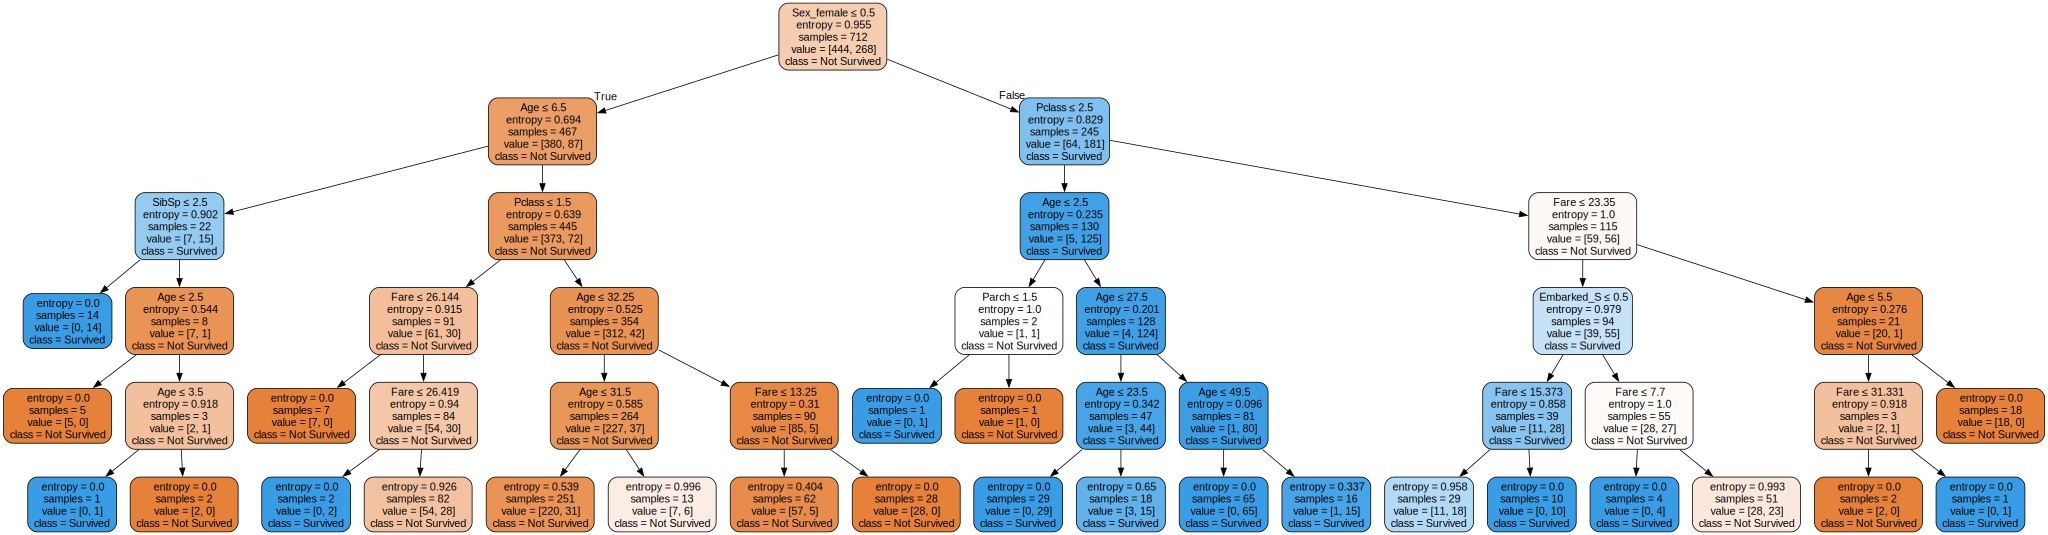

In [27]:
# graph.render("decision_tree") 
graph

In [28]:
feature_importance = pd.DataFrame({'feature': X_train.columns,
                                  'importance': decision_tree.feature_importances_}).sort_values('importance', ascending=False)
feature_importance

,feature,importance
5,Sex_female,0.457167
0,Pclass,0.215909
1,Age,0.144922
4,Fare,0.119181
2,SibSp,0.046222
9,Embarked_S,0.010637
3,Parch,0.005962
6,Sex_male,0.000000
7,Embarked_C,0.000000
8,Embarked_Q,0.000000


#### Top two splitting features: 
##### As seen from the above table, the top two features in the decision tree came out to be sex and Pclass which I think is fair enough like a passenger's survival mostly depends on whether the person is male or female and whether he/she is in economy or business class.

#### Would gini be appropriate here as well?
##### Using the Gini index would also be suitable because it’s another method of measuring the purity of splits in the tree, providing similar performance in classification tasks. Gini is computationally simpler than entropy (as it avoids the logarithmic calculations). While entropy provides more insight into information gain, Gini often yields similar splits, so both can be used effectively for classification tasks.

## Model Evaluation with Cross Validation
****

In [29]:
# Perform 5-fold cross-validation on the training data
cv_scores = cross_val_score(decision_tree, X_train, y_train, cv=5, scoring='accuracy')

### Interpretation:
1. **Accuracy as a Metric**: Accuracy can be appropriate if the dataset is relatively balanced between classes (e.g., similar numbers of 'Survived' and 'Not Survived' samples). However, if there is a significant class imbalance, other metrics like F1-score, precision, and recall might give more insight, as they better account for imbalanced data.

2. **Mean Accuracy and Variance**: The mean accuracy will show the overall performance across folds, while the standard deviation provides an indication of how much the accuracy varies across different subsets, reflecting the model's consistency. Lower variance generally indicates more stable performance.

In [30]:
# Report mean accuracy and standard deviation
mean_accuracy = np.mean(cv_scores)
std_dev = np.std(cv_scores)

print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Accuracy Variance (±): {std_dev:.4f}")

Mean Accuracy: 0.8104
Accuracy Variance (±): 0.0192


## Hyperparameter Tuning
****

Depth | Mean Accuracy (Entropy) | Variance (Entropy) | Top Feature (Entropy)
1     | 0.7879              | 0.0293         | ['Sex_male']
2     | 0.7865              | 0.0306         | ['Sex_male', 'Pclass']
3     | 0.8230              | 0.0116         | ['Sex_male', 'Pclass']
4     | 0.8132              | 0.0174         | ['Sex_male', 'Pclass']
5     | 0.8090              | 0.0177         | ['Sex_male', 'Pclass']
6     | 0.8033              | 0.0152         | ['Sex_male', 'Pclass']
7     | 0.7949              | 0.0252         | ['Sex_male', 'Pclass']
8     | 0.8005              | 0.0133         | ['Sex_male', 'Pclass']
9     | 0.7991              | 0.0098         | ['Sex_male', 'Pclass']
10    | 0.7978              | 0.0163         | ['Sex_male', 'Pclass']
11    | 0.7977              | 0.0154         | ['Sex_male', 'Pclass']
12    | 0.7780              | 0.0226         | ['Sex_male', 'Pclass']
13    | 0.7781              | 0.0164         | ['Sex_male', 'Pclass']
14    | 0.7669         

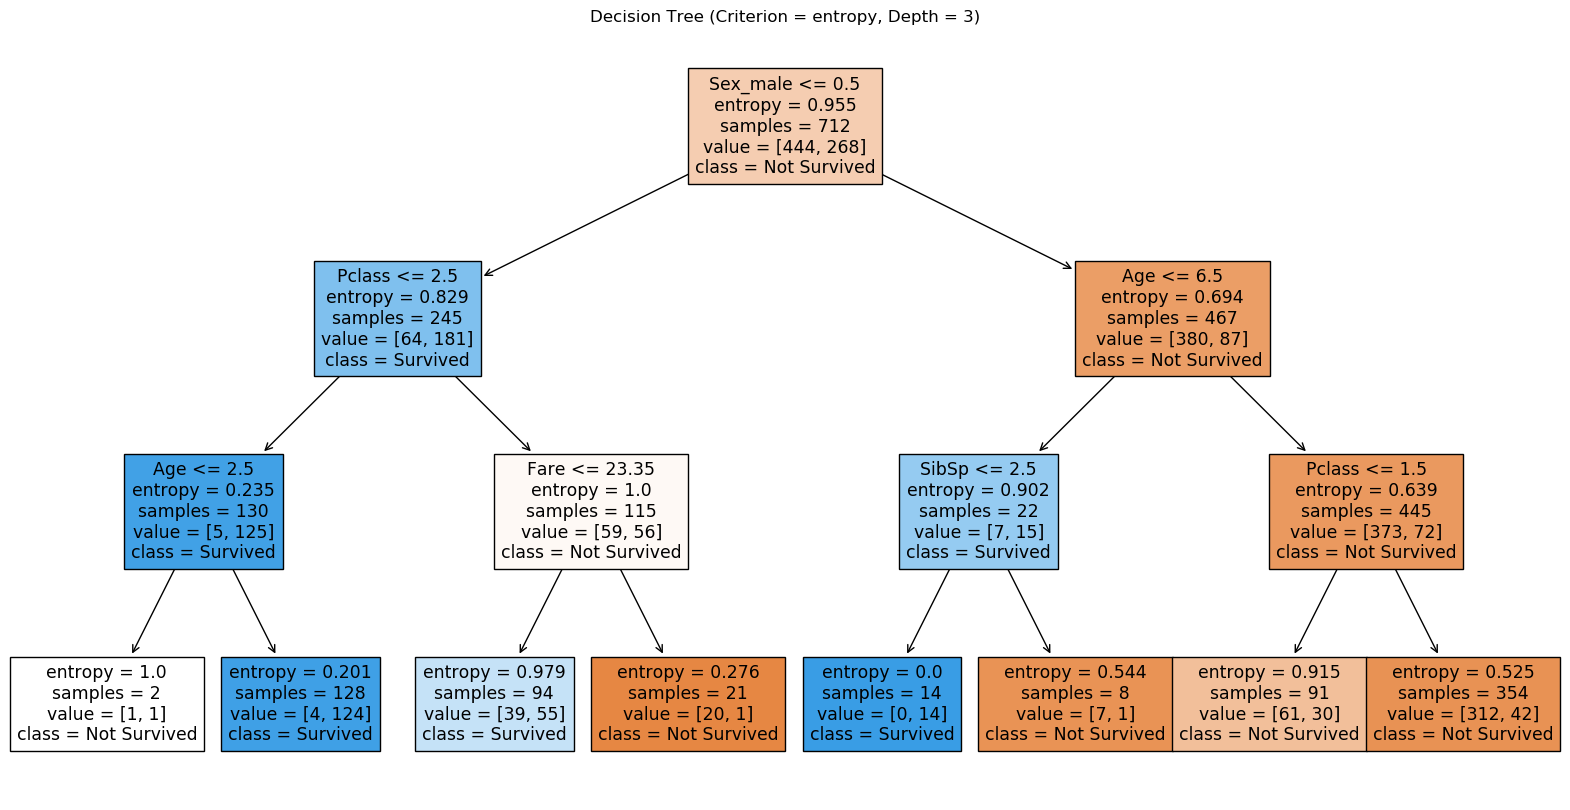

In [31]:
from sklearn import tree

# Store results
entropy_results = []
gini_results = []
entropy_top_splitting_features = {}
gini_top_splitting_features = {}

# Initialize variables to track the best model
best_model = None
best_criterion = None
best_depth = None
best_accuracy = 0

# Loop through max_depth from 1 to 20
for depth in range(1, 21):
    # Using 'entropy' as criterion
    decision_tree_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=0)
    entropy_scores = cross_val_score(decision_tree_entropy, X_train, y_train, cv=5, scoring='accuracy')
    mean_entropy_score = np.mean(entropy_scores)
    entropy_results.append((depth, mean_entropy_score, np.std(entropy_scores)))
    
    # Update best model if current entropy model is better
    if mean_entropy_score > best_accuracy:
        best_model = decision_tree_entropy
        best_criterion = 'entropy'
        best_depth = depth
        best_accuracy = mean_entropy_score

    # Fit to get the top 2 features for each depth
    decision_tree_entropy.fit(X_train, y_train)
    top_features = [X_train.columns[i] for i in decision_tree_entropy.tree_.feature if i != -2][:2]
    entropy_top_splitting_features[depth] = top_features
    
    # Using 'gini' as criterion
    decision_tree_gini = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=0)
    gini_scores = cross_val_score(decision_tree_gini, X_train, y_train, cv=5, scoring='accuracy')
    mean_gini_score = np.mean(gini_scores)
    gini_results.append((depth, mean_gini_score, np.std(gini_scores)))
    
    # Update best model if current gini model is better
    if mean_gini_score > best_accuracy:
        best_model = decision_tree_gini
        best_criterion = 'gini'
        best_depth = depth
        best_accuracy = mean_gini_score

    # Fit to get the top 2 features for each depth
    decision_tree_gini.fit(X_train, y_train)
    top_features = [X_train.columns[i] for i in decision_tree_gini.tree_.feature if i != -2][:2]
    gini_top_splitting_features[depth] = top_features

# Display the results in a table-like format
print("Depth | Mean Accuracy (Entropy) | Variance (Entropy) | Top Feature (Entropy)")
for depth, mean_accuracy, std_dev in entropy_results:
    print(f"{depth:<5} | {mean_accuracy:.4f}              | {std_dev:.4f}         | {entropy_top_splitting_features[depth]}")

print("\nDepth | Mean Accuracy (Gini)    | Variance (Gini)    | Top Feature (Gini)")
for depth, mean_accuracy, std_dev in gini_results:
    print(f"{depth:<5} | {mean_accuracy:.4f}              | {std_dev:.4f}         | {gini_top_splitting_features[depth]}")

# Print the best model details
print(f"\nBest Model: Criterion = {best_criterion}, Depth = {best_depth}, Accuracy = {best_accuracy:.4f}")

# Train the best model on the full training data to plot the decision tree
best_model.fit(X_train, y_train)

# Plotting the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(best_model, feature_names=X_train.columns, class_names=['Not Survived', 'Survived'], filled=True, max_depth=3)
plt.title(f"Decision Tree (Criterion = {best_criterion}, Depth = {best_depth})")
plt.show()


### Observations:
#### For both gini and entropy, the accuracy and came out to be almost same which represents that with whatever we try, we would get almost same predictions. Even the top two splitting features also remained same with both the metrics, that are, sex_male and Pclass.

## Entropy and Gini code
***

In [32]:
def calculate_entropy(data):
    # Count the occurrences of each class in the dataset
    class_labels, counts = np.unique(data, return_counts=True)
    
    # Calculate the probability of each class
    probabilities = counts / counts.sum()
    
    # Calculate entropy
    entropy = -np.sum(probabilities * np.log2(probabilities))
    
    return entropy

# Test cases
test_cases = [
    [1, 2, 2, 3, 3, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [2, 3]
]

# Calculate and print entropy for each test case
for i, test_case in enumerate(test_cases):
    entropy_value = calculate_entropy(test_case)
    print(f"Test Case {i + 1}: {test_case} -> Entropy: {entropy_value:.4f}")

Test Case 1: [1, 2, 2, 3, 3, 3] -> Entropy: 1.4591
Test Case 2: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] -> Entropy: -0.0000
Test Case 3: [2, 3] -> Entropy: 1.0000


In [33]:
def calculate_gini(data):
    """
    Calculate the Gini index of a dataset.

    Parameters:
    data (list): A list of class labels (integers).

    Returns:
    float: The Gini index of the dataset.
    """
    # Count the occurrences of each class in the dataset
    class_labels, counts = np.unique(data, return_counts=True)
    
    # Calculate the probability of each class
    probabilities = counts / counts.sum()
    
    # Calculate Gini index
    gini_index = 1 - np.sum(probabilities ** 2)
    
    return gini_index

# Test cases
test_cases = [
    [1, 2, 2, 3, 3, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [2, 3]
]

# Calculate and print Gini index for each test case
for i, test_case in enumerate(test_cases):
    gini_value = calculate_gini(test_case)
    print(f"Test Case {i + 1}: {test_case} -> Gini Index: {gini_value:.4f}")

Test Case 1: [1, 2, 2, 3, 3, 3] -> Gini Index: 0.6111
Test Case 2: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] -> Gini Index: 0.0000
Test Case 3: [2, 3] -> Gini Index: 0.5000


In [34]:
# Make predictions
predictions = decision_tree.predict(test_data_features)

# Display the predictions
print(predictions)

[0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 0 1 1 0 0 1 0 0 0]


In [35]:
# 'predictions' is our array of predicted values
predictions_df = pd.DataFrame(predictions, columns=['Survived'])

# Add the predictions as a new column to the test data
test_set_with_predictions = pd.concat([data_test.reset_index(drop=True), predictions_df], axis=1)

# Display the first few rows of the updated test set
print(test_set_with_predictions.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Embarked  Survived  
0  34.5      0      0   330911   7.8292        Q         0  
1  47.0      1      0   363272   7.0000        S         1  
2  62.0      0      0   240276   9.6875        Q         0  
3  27.0      0      0   315154   8.6625        S         0  
4  22.0      1      1  3101298  12.2875        S         0  


In [36]:
test_set_with_predictions = pd.DataFrame({
    'PassengerId': data_test['PassengerId'],
    'Survived': predictions                     
})

In [37]:
# Save the DataFrame to a CSV file
test_set_with_predictions.to_csv('test_predictions.csv', index=False)

In [38]:
# Specifying the path to our Downloads folder
downloads_path = r'C:\Users\123hu\Downloads\test_predictions.csv'

# Save the DataFrame to the specified path
test_set_with_predictions.to_csv(downloads_path, index=False)